In [2]:
import copy
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

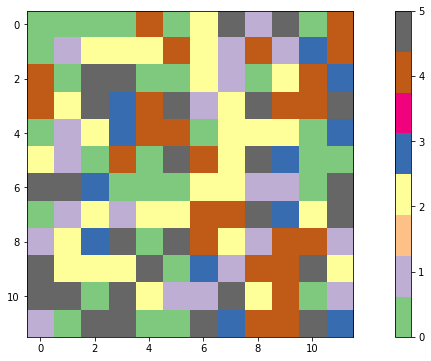

In [3]:
SIZE=12
COLOURS=6

def gameboard():
    random_board = [[random.randrange(COLOURS) for _ in range(SIZE)] for _ in range(SIZE)]
    if 0 == random.randrange(2):
        random_board[0][1] = random_board[0][0]
    else:
        random_board[1][0] = random_board[0][0]
    return random_board

def display_c(board):
    plt.figure(2)
    plt.colorbar(
        display(board),
    )

def display(board):
    return plt.imshow(board, cmap='Accent')

START=gameboard()
display_c(START)

In [4]:
def adjacents(pos):
    x, y = pos

    if x > 0:
        yield (x-1, y)
    if y > 0:
        yield (x, y-1)
    if x < SIZE-1:
        yield (x+1, y)
    if y < SIZE-1:
        yield (x, y+1)

MARKER = -1
def mark_flood(board):
    src = board[0][0]

    board = copy.deepcopy(board)
    todo = list(adjacents((0, 0)))
    while len(todo):
        us = todo.pop()
        if board[us[0]][us[1]] != src:
            continue
        todo.extend(adjacents(us))
        board[us[0]][us[1]] = MARKER

    return board

def marked_replace(board, target: int):
    return [[target if MARKER == x else x for x in y] for y in board]

def marked_score(board):
    return sum(sum(1 for x in y if MARKER == x) for y in board)

def victory(board):
    for x in range(SIZE):
        for y in range(SIZE):
            if board[0][0] != board[x][y]:
                return False
    return True


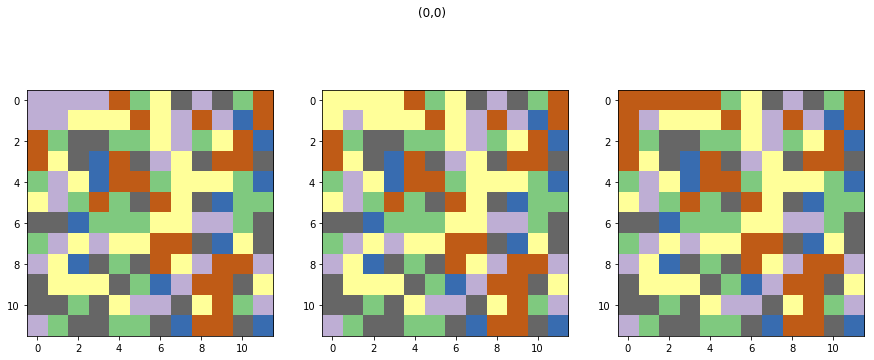

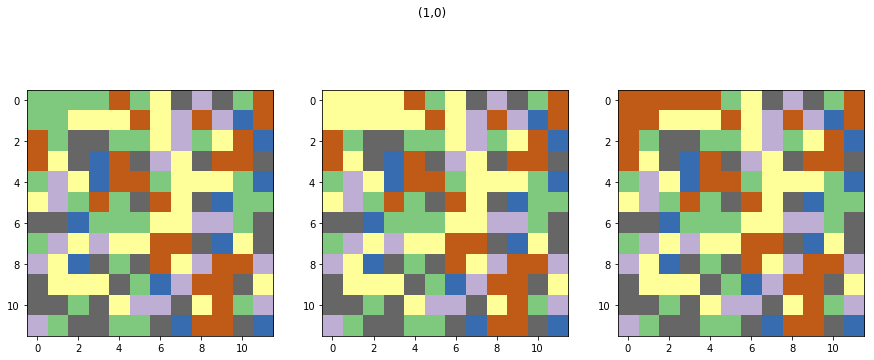

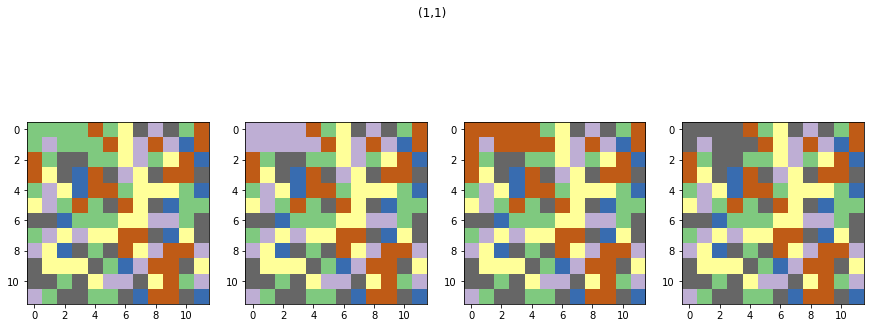

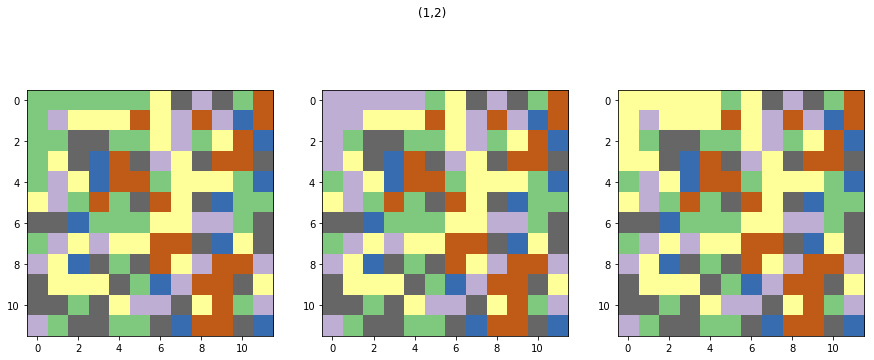

In [5]:
def step(board):
    marked = mark_flood(board)
    init_score = marked_score(marked)
    for i in range(COLOURS):
        if i == board[0][0]:
            continue
        cand = marked_replace(marked, i)
        new_score = marked_score(mark_flood(cand))
        if new_score <= init_score:
            continue

        yield cand

def display_step(s):
    for i in range(len(s)):
        plt.subplot(1, len(s), 1+i)
        display(s[i])

first = list(step(START))
plt.suptitle('(0,0)')
display_step(first)
for i, x in enumerate(first):
    a = list(step(x))
    plt.figure()
    plt.suptitle('(1,{})'.format(i))
    display_step(a)